In [4]:
import sys, os

os.chdir("../../")
sys.path.append("./../src/data")
sys.path.append("./../src/events")
sys.path.append("./../src/probability")
import numpy as np
import matplotlib.pyplot as plt
from plotter import P_over_E_parameter
from events import list_of_params
from functions import ic_params
from plotter import oscillogram


def list_of_params_5gen(dict, dm51_range, th25_range, th35_range):
    def update_dict(dict, p):
        dict2 = dict.copy()
        dict2.update(p)
        return dict2

    dict_list = [
        update_dict(dict, {"dm_51": dm, "theta_25": th25, "theta_35": th35})
        for dm in dm51_range
        for th25 in th25_range
        for th35 in th35_range
    ]
    return dict_list


def list_of_params_5gen(dict, dm, th_range):
    def update_dict(dict, p):
        dict2 = dict.copy()
        dict2.update(p)
        return dict2

    dict_list = [
        update_dict(
            dict,
            {
                "dm_51": dm,
                "theta_35": np.arcsin(np.sqrt(th)),
                "theta_15": 0,
                "theta_25": np.arcsin(np.sqrt(th)),
            },
        )
        for th in th_range
    ]
    return dict_list

In [5]:
E_range = np.logspace(np.log10(500), 4, 50)
dm51_range = [0.87]  # np.linspace(-1e-1,1e-1,3)
th_range = [0, 0.04]  # np.linspace(-1e-1,1e-1,3)
params = ic_params.copy()
anti = True
params.update(
    {
        "theta_24": np.arcsin(np.sqrt(0.04)),
        "dm_41": 0.47,
        "theta_34": np.arcsin(np.sqrt(0.04)),
    }
)
params_5gen = list_of_params_5gen(params, 0.87, th_range)
zenith = -1

Pamax = P_over_E_parameter(
    "m", params_5gen, E=E_range, ndim=5, nsi=False, anti=True, zenith=zenith
)
Pmx = P_over_E_parameter(
    "m", params_5gen, E=E_range, ndim=5, nsi=False, anti=False, zenith=zenith
)

# Pmm = P_over_E_parameter('m',[params],E=E_range, ndim=5, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
# Pmm_3gen = P_over_E_parameter('m',params,E=E_range, ndim=3, nsi=False,anti=anti,zenith=zenith)[:,1,:].reshape(-1,)
# Pmm_5gen=Pmm_5gen.reshape(len(dm51_range)*len(th25_range),-1)
Pmm = Pmx[:, 1, :]
Pamam = Pamax[:, 1, :]
Pmt = Pmx[:, 2, :]
Pamat = Pamax[:, 2, :]

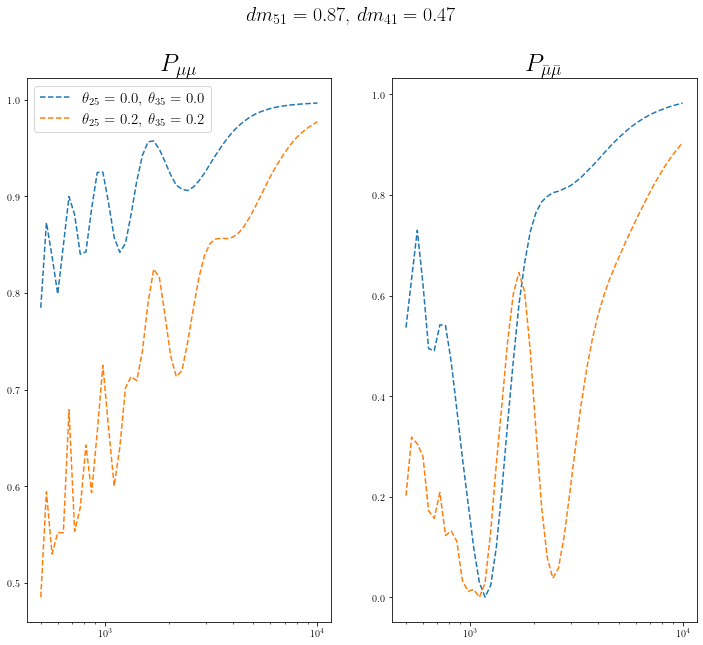

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
ax = ax.flatten()
for p in range(Pmx.shape[0]):
    ax[0].plot(
        E_range,
        Pmm[p, :],
        ls="dashed",
        label=r"$\theta_{25}=$ "
        + f'{np.round(params_5gen[p]["theta_25"],2)}, '
        + r"$\theta_{35}=$ "
        + f'{np.round(params_5gen[p]["theta_35"],2)}',
    )
    #    ax[1].plot(E_range, Pmt[p,:], ls='dashed', label=f'$dm_51: {np.round(params_5gen[p]["dm_51"],2)}, \\theta_25: {np.round(params_5gen[p]["theta_25"],2)}, \\theta_35: {np.round(params_5gen[p]["theta_35"],2)}$')
    ax[1].plot(
        E_range,
        Pamam[p, :],
        ls="dashed",
        label=f'$dm_51: {np.round(params_5gen[p]["dm_51"],2)}, \\theta_25: {np.round(params_5gen[p]["theta_25"],2)}, \\theta_35: {np.round(params_5gen[p]["theta_35"],2)}$',
    )
#    ax[3].plot(E_range, Pamat[p,:], ls='dashed', label=f'$dm_51: {np.round(params_5gen[p]["dm_51"],2)}, \\theta_{"25"}: {np.round(params_5gen[p]["theta_25"],2)}, \\theta_35: {np.round(params_5gen[p]["theta_35"],2)}$')
# plt.plot(E_range, Pmm, label='3+1',c='red')
ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_title(r"$P_{\mu\mu}$", fontsize=25)
ax[1].set_title(r"$P_{\bar{\mu}\bar{\mu}}$", fontsize=25)
# ax[2].set_xscale('log')
# ax[3].set_xscale('log')
plt.suptitle("$dm_{51}= 0.87$, $dm_{41} = 0.47$", fontsize=20)
ax[0].legend(prop={"size": 15})

using best fit dm51 = 0.87, dm41=0.47
s15 no impact at all
s25 > 0.15 gives a resonance dip at 3 TeV thats not present for lower theta_25. Seemws unaffected by th_24/th_34
s35 has little impact. Same shape, but somewhat shifted.

theta_25=2*theta_35 seems to give a broader resonance (double dip) for s35=0.04 => maybe big impact?
theta_35=2*theta_25 gives the dips too far apart => little impact

for s24 = s34 = s25 = s35 = 0.04 we get clear double dips in Pamam, and a very supressed Pmm compared to s25=s35=0. This effect disappears somewhat when s35=0 and completely when s25=0


s34=0
theta_25 turns on the double dip at 2 TeV (triples the width of the resonance from dm51)
when s25=s35=0.1, we get a huge difference in both channels!

Conclusions:
similar behavior as 3+1. th_25 drives the biggest impact, with some nonzero values of th_35 contributing to two rewsonance peaks.
Big differences in both channels for large values (s_25=s_35=0.1). 

Since we saw little to no difference in the contour in the 3+1 case whn activating th34=th24, will it make an impact here?  It should make a bigger impact, since th35 contributes to the double dip, hence making the resonance wider. 
